In [39]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.spatial.distance import euclidean,cosine,pdist,squareform
from IPython.display import Image
from IPython.core.display import Image, display

In [2]:
oxfords_db = 'trial_boots_full_data.csv'
oxfords_features = 'boots_data_features.csv'
boots_db = 'trial_boots_full_data.csv'
boots_features = 'boots_data_features.csv'


In [45]:
odf = pd.read_csv(oxfords_db,index_col=0)

In [4]:
ox_feat = pd.read_csv(oxfords_features,index_col=0)

In [5]:
odf.head()

,brand,color,key,msrp,name,sale,subcategory,url,view,like_product_key_0,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,Hi-Tec,Dark Chocolate,boots_product_8887793_color_336,$99.99,Altitude VI I WP,$89.99,Boots,https://www.zappos.com/p/hi-tec-altitude-vi-i-...,pair,boots_product_7246473_color_336,...,1.449980,1.889984,0.0,0.303017,0.000000,1.443507,0.0,5.624354,0.000000,0.0
1,Hi-Tec,Dark Chocolate,boots_product_8887793_color_336,$99.99,Altitude VI I WP,$89.99,Boots,https://www.zappos.com/p/hi-tec-altitude-vi-i-...,top,boots_product_7246473_color_336,...,0.396215,4.817302,0.0,0.000000,2.370382,0.000000,0.0,0.000000,1.255618,0.0
2,Hi-Tec,Dark Chocolate,boots_product_8887793_color_336,$99.99,Altitude VI I WP,$89.99,Boots,https://www.zappos.com/p/hi-tec-altitude-vi-i-...,left,boots_product_7246473_color_336,...,0.316464,2.309007,0.0,2.917153,0.000000,6.556010,0.0,9.202756,0.000000,0.0
3,Hi-Tec,Dark Chocolate,boots_product_8887793_color_336,$99.99,Altitude VI I WP,$89.99,Boots,https://www.zappos.com/p/hi-tec-altitude-vi-i-...,right,boots_product_7246473_color_336,...,0.000000,5.060963,0.0,2.428973,0.000000,5.528935,0.0,8.433278,0.000000,0.0
4,Clarks,Taupe Nubuck,boots_product_8990180_color_21,$135.00,Atticus Limit,$94.50,Boots,https://www.zappos.com/p/clarks-atticus-limit-...,pair,boots_product_7257865_color_2206,...,1.771639,0.000000,0.0,0.000000,0.000000,5.389711,0.0,3.222349,1.379169,0.0


In [6]:
#odf.msrp = odf.msrp.astype(float)
odf.msrp = odf.msrp.replace('[\$,]', '', regex=True).astype(float)

In [7]:
odf.sale = odf.sale.replace('[\$,]', '', regex=True).astype(float)

/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


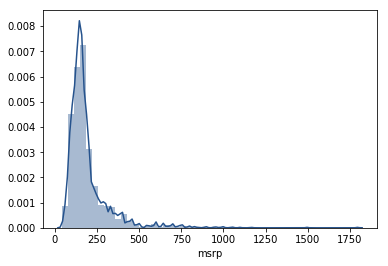

In [8]:
sn.distplot(odf['msrp'])

In [9]:
sale_with_nans=odf['sale']
sale_no_nans=sale_with_nans[~np.isnan(sale_with_nans)] # Remove the NaNs

/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


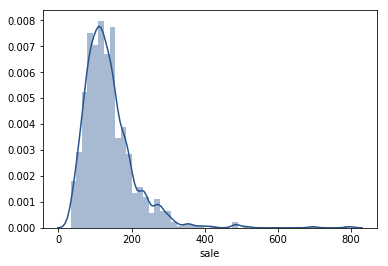

In [10]:
sn.distplot(sale_no_nans)

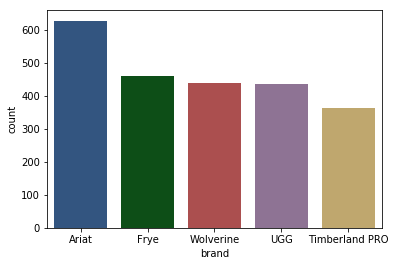

In [11]:
top_n = 5
sn.countplot(odf['brand'],order=odf.brand.value_counts().iloc[:top_n].index)

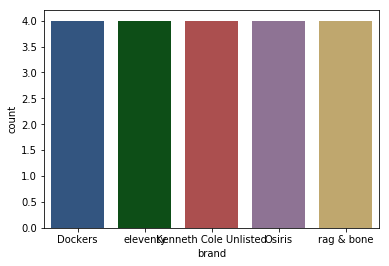

In [12]:
last_n = 5
sn.countplot(odf['brand'],order=odf.brand.value_counts().iloc[-last_n:].index)

In [13]:
oxf = ox_feat.values

In [14]:
oxf.shape

(12000, 4096)

In [22]:
all_zero_columns = np.where(~oxf.any(axis=0))[0]

In [26]:
all_zero_columns = np.where(~oxf.all(axis=0))[0]

In [29]:
len(np.where(~oxf.all(axis=0))[0])

4096

In [24]:
non_zero_columns = np.where(oxf.any(axis=0))[0]

In [25]:
len(non_zero_columns)

4068

In [30]:
cols_without_zeros = oxf[~np.all(oxf==0, axis=1)]

In [31]:
cols_without_zeros.shape

(12000, 4096)

In [34]:
oxf_nonzero = oxf[:,non_zero_columns]

In [35]:
oxf_nonzero.shape

(12000, 4068)

In [54]:
l2 = np.zeros((oxf_nonzero.shape[0],oxf_nonzero.shape[0]))
cos = np.zeros((oxf_nonzero.shape[0],oxf_nonzero.shape[0]))

In [ ]:
for i in range(oxf_nonzero.shape[0]):
    for j in range(i,oxf_nonzero.shape[0]):
        l2[i,j] = euclidean(oxf_nonzero[i,:],oxf_nonzero[j,:])
        cos[i,j] = cosine(oxf_nonzero[i,:],oxf_nonzero[j,:])
        #if i!=j:
        #    l2[j,i] = euclidean(oxf_nonzero[i,:],oxf_nonzero[j,:])
        #    cos[j,i] = cosine(oxf_nonzero[i,:],oxf_nonzero[j,:])
            
            

In [38]:
oxf_eu = pdist(oxf, 'euclidean')
G_eu = squareform(oxf_eu)
oxf_cos = pdist(oxf,'cosine')
G_cos = squareform(oxf_cos)

In [ ]:
oxf_seu = pdist(oxf,'seuclidean')
G_seu = squareform(oxf_seu)

In [55]:
def print_similar_shoes(image_index,dataframe,G):
    PATH = dataframe['image_path'].iloc[image_index]
    similar_eu_dist = np.argsort(G[image_index,:])
    
    print('Original Image')
    #print('path: {}'.format(PATH))
    display(Image(filename = PATH, width=100, height=100))

    sim1_PATH = dataframe['image_path'].iloc[similar_eu_dist[1]]
    print('Similar Shoe: #1')
    #print('path: {}'.format(PATH))
    display(Image(filename = sim1_PATH, width=100, height=100))
    sim1_PATH = dataframe['image_path'].iloc[similar_eu_dist[2]]
    print('Similar Shoe: #2')
    #print('path: {}'.format(PATH))
    display(Image(filename = sim1_PATH, width=100, height=100))
    sim1_PATH = dataframe['image_path'].iloc[similar_eu_dist[3]]
    print('Similar Shoe: #3')
    #print('path: {}'.format(PATH))
    display(Image(filename = sim1_PATH, width=100, height=100))
    sim1_PATH = dataframe['image_path'].iloc[similar_eu_dist[4]]
    print('Similar Shoe: #4')
    #print('path: {}'.format(PATH))
    display(Image(filename = sim1_PATH, width=100, height=100))

Original Image


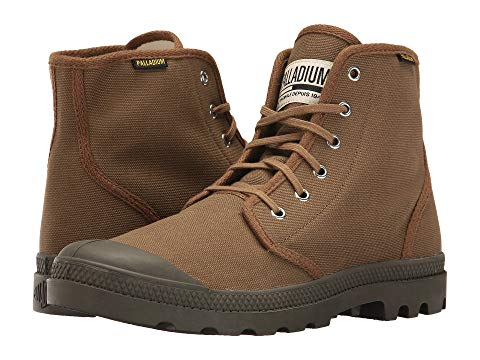

Similar Shoe: #1


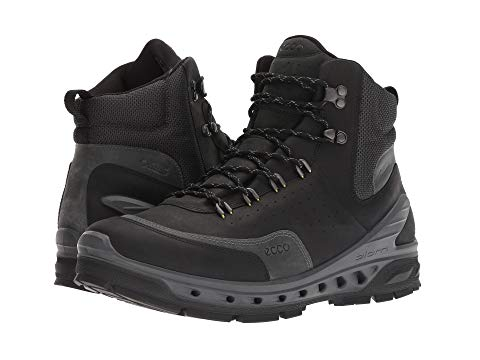

Similar Shoe: #2


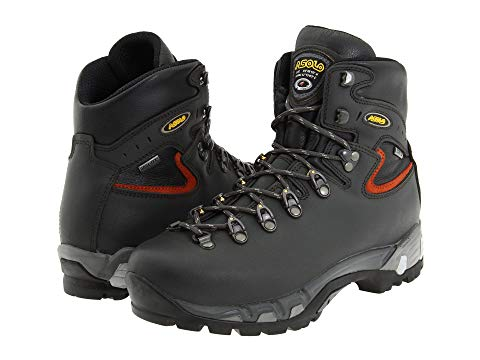

Similar Shoe: #3


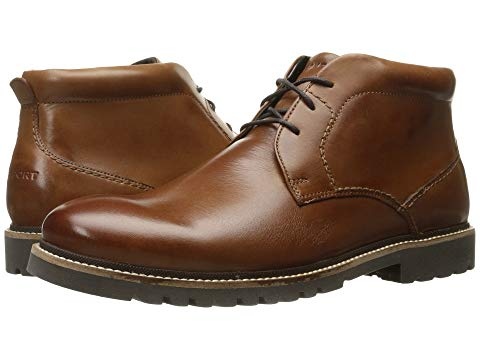

Similar Shoe: #4


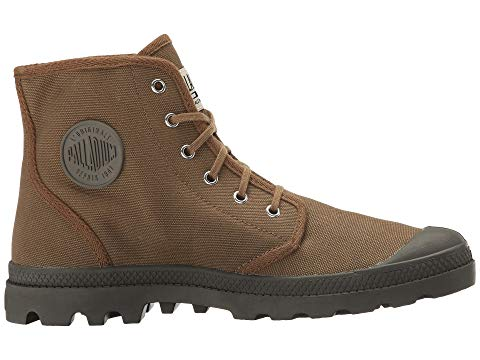

In [56]:
print_similar_shoes(1000,odf,G_eu)